<a href="https://colab.research.google.com/github/wordsbyanmol/PUS2024_AArora/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Federica B. Bianco @fedhere
# for UDel PUS
# This is my example of Assignment 2.
# Assignment 2 you should design your own investigation into the citibike data.
- # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data.
At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- # Choose the significance threshold
- # Clearly state they Null and Alternate hypothesis (in words and a math formula)
- # Wrangle the data so that it is ready for your analysis.
- # Explore the data statistical properties (mean, standard deviation...)
- # Answer your question with a Z test
- # Answer your question with a xhi square test of proportions

In [ ]:
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np
import numpy as np
import statsmodels.api as sm

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


**IDEA**
The proportion of people that are commuters could be lower than subscribers to choose biking for commuting in May. This may be the case because subscribers have subscribed to the service in advance.

Null
The proportion of people that are Commuters are same or higher than Subscribers to choose citi biking for commuting in May.


Alternate
The proportion of people that are Commuters are lower than subscribers to choose citi biking for commuting in May.

equation1 = "H0: Cusers/Ctotal >= Susers/Stotal"
equation2 = "H1: Cusers/Ctotal < Susers/Stotal"

I will use a significance level  𝛼=0.05

The Z-test for proportions is valid as the data points (users) are independent.

For a one-tailed Z-test at 95% confidence level, the critical value is approximately -1.645. If the calculated Z value is less than -1.645, we reject the null hypothesis.



## I am starting with a single month of data:  reading data from citibike csv file from May 2024

what I want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". You can think of it as a python dictionary in many ways,but it has many added capabilities: it is easy to convert variables within it, it knows how to plot itself, etc.

In [ ]:

import pandas as pd
import zipfile
import requests
from io import BytesIO

In [ ]:
datestring = '2019'

# Define the URL of the zip file
url = "https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip"

# Download the zip file
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

In [ ]:
zip_file.extractall() #extract all the files in the zipped folder locally

I am going to look in the now local files (extracted with the command above) to find what I want

In [ ]:
!ls

2019-citibike-tripdata	drive  __MACOSX  sample_data


In [ ]:
!ls 2019-citibike-tripdata

10_October   12_December  2_February  4_April  6_June  8_August
11_November  1_January	  3_March     5_May    7_July  9_September


In [ ]:
!ls 2019-citibike-tripdata/5_May

201905-citibike-tripdata_1.csv	201905-citibike-tripdata_2.csv


In [ ]:
# Read the CSV file from the zip file
cbMay19 = pd.read_csv(datestring + '-citibike-tripdata/5_May/' + datestring + '05-citibike-tripdata_1.csv')

In [ ]:
#Explore data
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1688,2019-05-18 10:43:11.5260,2019-05-18 11:11:20.5010,525,W 34 St & 11 Ave,40.755942,-74.002116,3178,Riverside Dr & W 78 St,40.784145,-73.983625,25733,Customer,1969,0
999996,804,2019-05-18 10:43:12.1750,2019-05-18 10:56:37.0660,3576,Park Pl & Vanderbilt Ave,40.676700,-73.969024,157,Henry St & Atlantic Ave,40.690893,-73.996123,29920,Subscriber,1981,1
999997,150,2019-05-18 10:43:12.6190,2019-05-18 10:45:42.7890,416,Cumberland St & Lafayette Ave,40.687534,-73.972652,262,Washington Park,40.691782,-73.973730,18835,Subscriber,1971,1
999998,345,2019-05-18 10:43:13.2630,2019-05-18 10:48:58.7550,296,Division St & Bowery,40.714131,-73.997047,502,Henry St & Grand St,40.714215,-73.981346,34018,Subscriber,1983,1


In [ ]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [ ]:
#add a datetime object
cbMay19["date"] = pd.to_datetime(cbMay19.starttime)

In [ ]:
#clean up to keep only relevant variables
cbMay19.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

In [ ]:
cbMay19

,usertype,date
0,Subscriber,2019-05-01 00:00:01.901
1,Customer,2019-05-01 00:00:03.021
2,Subscriber,2019-05-01 00:00:04.627
3,Subscriber,2019-05-01 00:00:19.334
4,Subscriber,2019-05-01 00:00:22.184
...,...,...
999995,Customer,2019-05-18 10:43:11.526
999996,Subscriber,2019-05-18 10:43:12.175
999997,Subscriber,2019-05-18 10:43:12.619
999998,Subscriber,2019-05-18 10:43:13.263


In [ ]:
# Count the number of subscribers and customers
n_subscribers = (cbMay19['usertype'] == 'Subscriber').sum()
n_customers = (cbMay19['usertype'] == 'Customer').sum()

print("Number of subscribers:", n_subscribers)
print("Number of customers:", n_customers)

Number of subscribers: 879244
Number of customers: 120756


In [ ]:
# Total number of users
n_total = len(cbMay19)

print("Total number of users:", n_total)

Total number of users: 1000000


In [ ]:
# Proportion of subscribers and customers
p_subscribers = n_subscribers / n_total
p_customers = n_customers / n_total

print ("Proportion of subscribers:", p_subscribers)
print ("Proportion of customers:", p_customers)

Proportion of subscribers: 0.879244
Proportion of customers: 0.120756


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

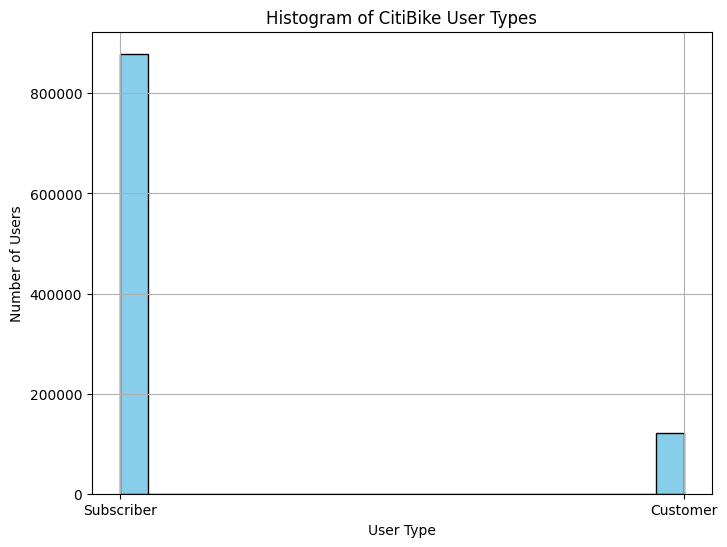

In [ ]:
#plot the usertype
plt.figure(figsize=(8,6))
plt.hist(cbMay19['usertype'], bins= 20, color= 'skyblue', edgecolor= 'black')
plt.title('Histogram of CitiBike User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

Figure displays the total number of usertype in citibike programme for May, 2019. The number of Subscribers far exceeds Customers.

<ipython-input-122-377971f97e2a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usertype_percentages.index, y=usertype_percentages.values, palette='Blues_d')


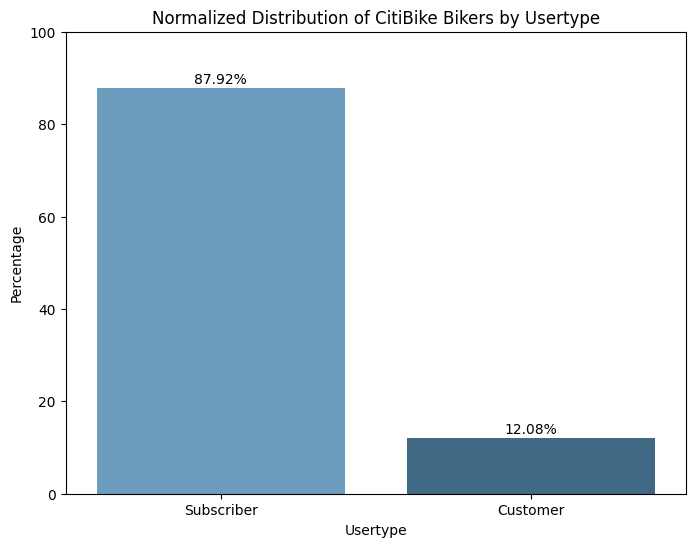

In [ ]:

# Calculate the normalized distribution
usertype_counts = cbMay19['usertype'].value_counts(normalize=True)


# Plot the normalized distribution using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=usertype_percentages.index, y=usertype_percentages.values, palette='Blues_d')
plt.title('Normalized Distribution of CitiBike Bikers by Usertype')
plt.xlabel('Usertype')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Display percentage values on the bars
for i, value in enumerate(usertype_percentages):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

# Show the plot
plt.show()

Figure displays the percentage of usertype in citibike programme for May, 2019.

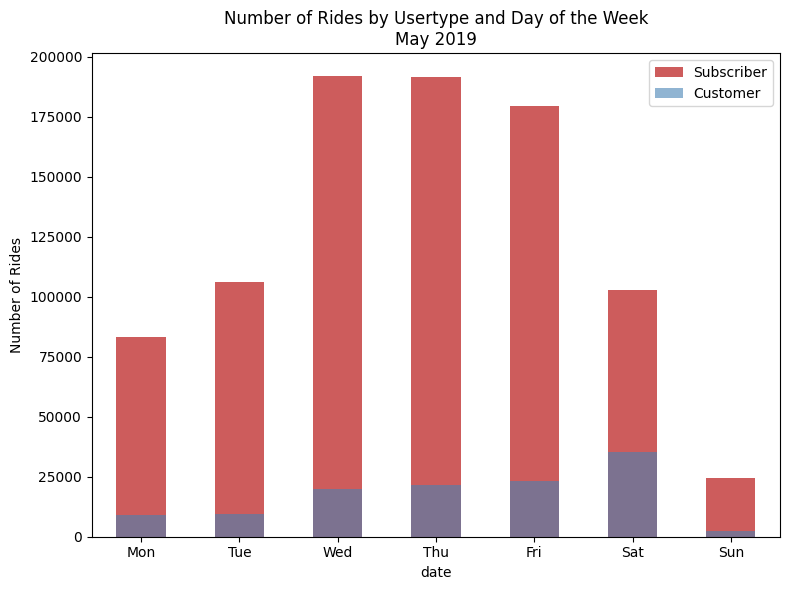

In [ ]:

# Filter for Subscriber usertype and count rides
cbMay19_s = cbMay19[cbMay19['usertype'] == 'Subscriber']
counts_s = cbMay19_s['date'].groupby(cbMay19_s.date.dt.weekday).count()

# Filter for Customer usertype and count rides
cbMay19_c = cbMay19[cbMay19['usertype'] == 'Customer']
counts_c = cbMay19_c['date'].groupby(cbMay19_c.date.dt.weekday).count()

# Create the bar plot for Subscribers
ax = counts_s.plot(kind="bar", color='IndianRed', label='Subscriber', figsize=(8, 6))

# Overlay the bar plot for Customers with transparency
counts_c.plot(kind="bar", color='SteelBlue', alpha=0.6, label='Customer', ax=ax)

# Set labels, title, and x-tick labels
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.legend()
plt.title("Number of Rides by Usertype and Day of the Week\nMay 2019")
plt.ylabel("Number of Rides")

# Show the plot
plt.tight_layout()
plt.show()


Figure displays the day wise distribution of user-type in citibike programme May 2019

In [ ]:
# Define the observed proportions
count = np.array([n_customers, n_subscribers])
nobs = np.array([n_total, n_total])

In [ ]:
# Perform the Z-test
z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='smaller')

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -1072.6640164972441
P-value: 0.0


In [ ]:
# Decision based on p-value
if p_value < 0.05:
    print("𝑝<0.05 , which is smaller then my chosen  𝛼=0.05. We reject the null hypothesis: Proportion of commuters is significantly same or higher than subscribers.")
else:
    print("Fail to reject the null hypothesis: Proportion of commuters is significantly same or higher than subscribers.")

𝑝<0.05 , which is smaller then my chosen  𝛼=0.05. We reject the null hypothesis: Proportion of commuters is significantly same or higher than subscribers.


The Z-statistic measures how many standard deviations the observed proportion is away from the null hypothesis.
A Z-value of  −1072.66 is an extremely large negative value, meaning the observed proportion of customers choosing CitiBike is much lower than expected under the null hypothesis, which stated that the proportion of customers would be equal to or greater than subscribers.

A P-value of
0.0
0.0 (essentially close to 0) indicates extremely strong evidence against the null hypothesis. This means the probability of observing such a large difference in proportions, assuming the null hypothesis is true, is nearly impossible.

Interpretation: There is significant evidence to support the alternative hypothesis that the proportion of customers using CitiBike is lower than the proportion of subscribers in May 2019.
Thus, it's clear that the majority of CitiBike users are subscribers, and the proportion of customers is much smaller.